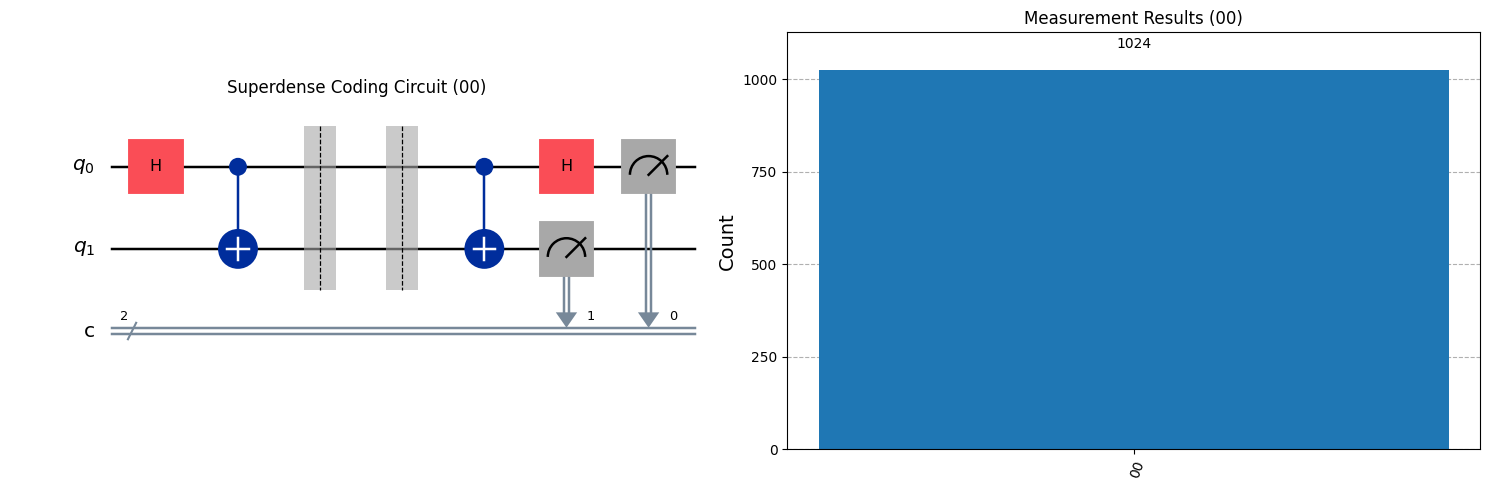

Superdense Coding Results for 00: {'00': 1024}



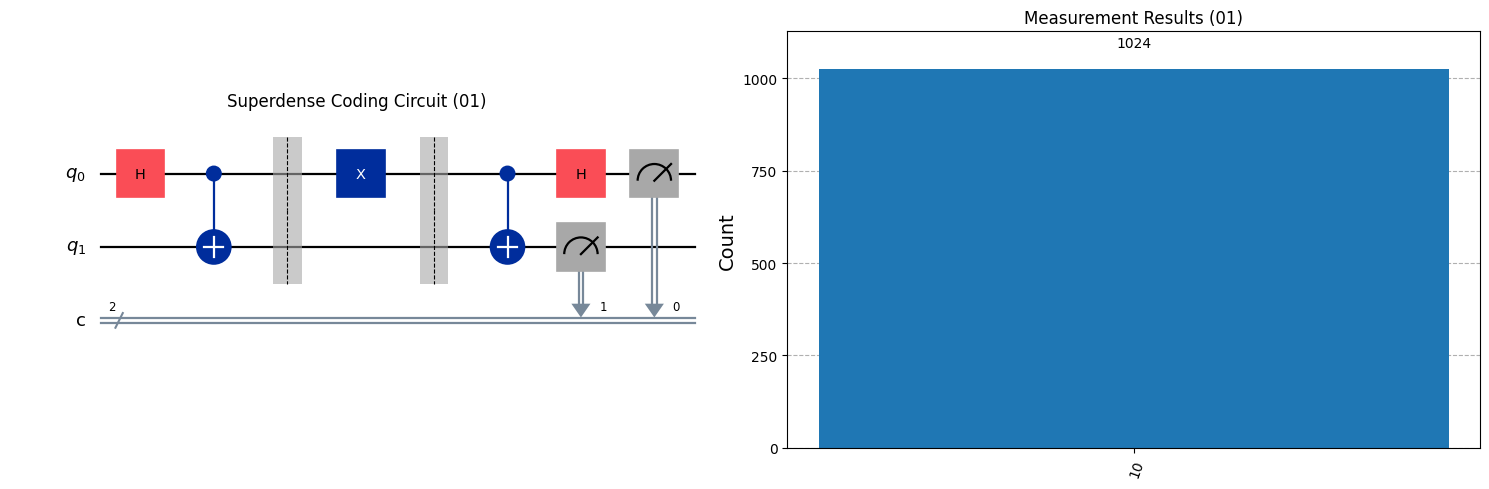

Superdense Coding Results for 01: {'10': 1024}



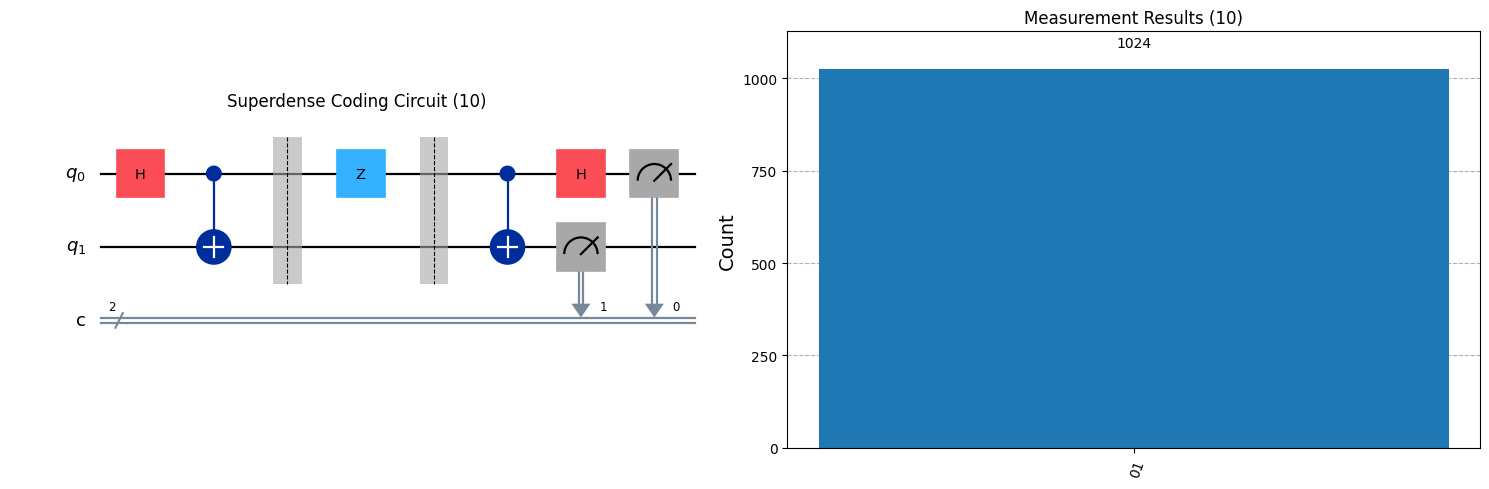

Superdense Coding Results for 10: {'01': 1024}



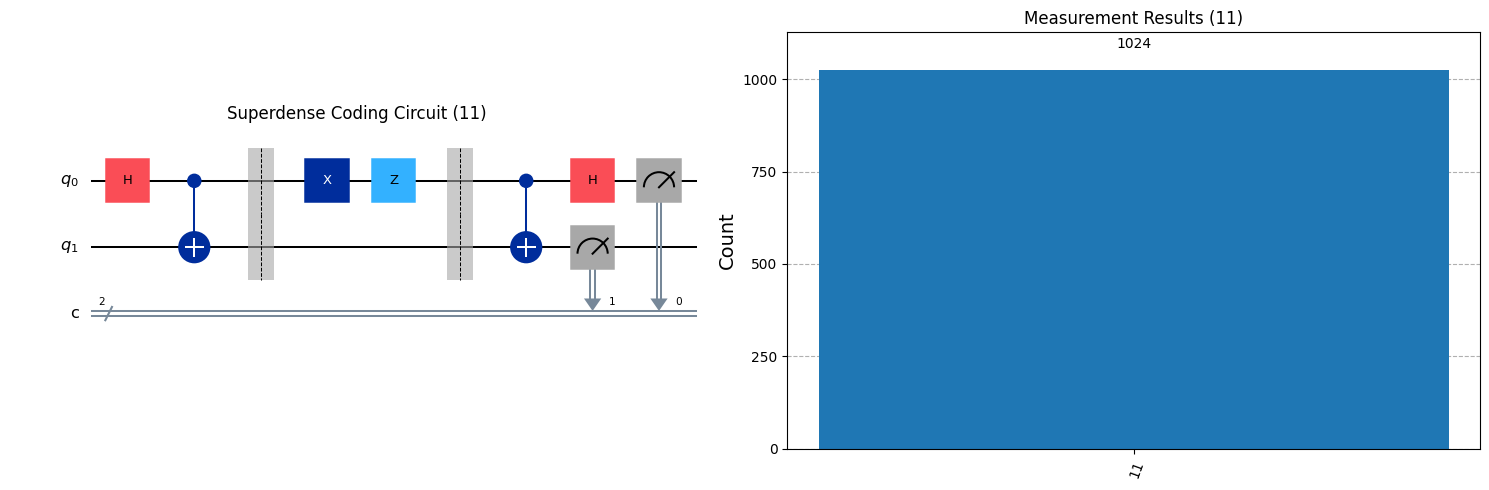

Superdense Coding Results for 11: {'11': 1024}



In [1]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# Function to perform Superdense Coding for any 2-bit message
def superdense_coding(bits):
    if len(bits) != 2 or any(b not in ['0','1'] for b in bits):
        raise ValueError("Input must be a 2-bit string like '00','01','10','11'")

    qc = QuantumCircuit(2,2)

    # Step 1: Create entanglement
    qc.h(0)
    qc.cx(0,1)
    qc.barrier()

    # Step 2: Alice encodes message
    if bits == '01':
        qc.x(0)
    elif bits == '10':
        qc.z(0)
    elif bits == '11':
        qc.x(0)
        qc.z(0)
    # '00' requires no operation
    qc.barrier()

    # Step 3: Bob decodes
    qc.cx(0,1)
    qc.h(0)
    qc.measure([0,1],[0,1])

    # Simulation
    sim = Aer.get_backend('aer_simulator')
    job = sim.run(qc)
    result = job.result()
    counts = result.get_counts()

    # Visualization
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
    qc.draw('mpl', ax=ax1)
    ax1.set_title(f'Superdense Coding Circuit ({bits})')
    plot_histogram(counts, ax=ax2)
    ax2.set_title(f'Measurement Results ({bits})')
    plt.tight_layout()
    plt.show()

    print(f"Superdense Coding Results for {bits}: {counts}\n")

# Test all 4 possible 2-bit messages
for msg in ['00','01','10','11']:
    superdense_coding(msg)